<a href="https://colab.research.google.com/github/KashishChanana/OneFourthLabs/blob/master/Sigmoid_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [0]:
data=pd.read_csv("mobile_cleaned.csv")

In [15]:
data.shape

(341, 88)

In [16]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [0]:
X=  data.drop("Rating", axis=1)
Y=data["Rating"].values

In [18]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold=4.2 #check for various threshold so as to get almost 50-50 0s and 1s for data 
data["Class"]=(data["Rating"]>=threshold).astype(np.int)

In [31]:
data["Class"].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised= data['Class'].values

#Standardisation of Data

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
R= np.random.random([100,1])

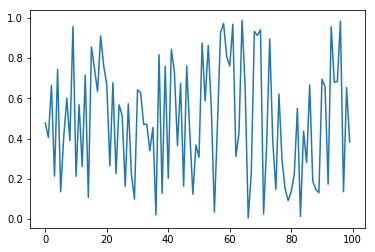

In [41]:
plt.plot(R)
plt.show()

In [42]:
R.mean()

0.4941450876881823

In [0]:
scaler= StandardScaler()

In [44]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaler.mean_

array([0.49414509])

In [0]:
RT= scaler.transform(R)

In [50]:
np.mean(RT)

1.0769163338864018e-16

In [51]:
np.std(RT)

1.0

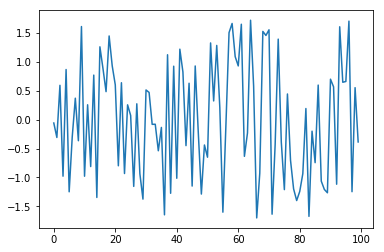

In [52]:
plt.plot(RT)
plt.show()

#Test train split

In [0]:
#split first then standardise
#standardise the test data according to the parameters learnt on the train data

In [0]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state=1, stratify= Y_binarised)

In [63]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [0]:
scaler=StandardScaler()

In [0]:
#Standardising input data
X_scaled_train=scaler.fit_transform(X_train) #fitting and tranforming
X_scaled_test= scaler.transform(X_test) #only transforming

In [0]:
#standardising output data trasforming data into a given range
minmaxscaler=MinMaxScaler()


In [0]:
Y_scaled_train= minmaxscaler.fit_transform(Y_train.reshape(-1,1))

In [0]:
Y_scaled_test= minmaxscaler.transform(Y_test.reshape(-1,1))

In [72]:
print(np.min(Y_scaled_train), np.max(Y_scaled_train))

0.0 1.0


In [0]:
scaled_threshold=list(minmaxscaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [0]:
Y_binarised_train=(Y_scaled_train> scaled_threshold).astype('int').ravel()

In [79]:
Y_binarised_train

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

In [0]:
Y_binarised_test=(Y_scaled_test> scaled_threshold).astype('int').ravel()

#Creating a sigmoid model

In [0]:
class sigmoidNeuron:
  def __init__(self):
    self.w=None
    self.b=None
  
  def perceptron(self, x):
    return np.dot(x,self.w.T)+self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0+np.exp(-x))
  
  def grad_w(self,x,y):
    y_pred= self.sigmoid(self.perceptron(x))
    return (y_pred-y)*(1-y_pred)*y_pred*x
    
  def grad_b(self,x, y):
    y_pred= self.sigmoid(self.perceptron(x))
    return (y_pred-y)*(1-y_pred)*y_pred
  
  def fit(self, X,Y,epochs=1, learning_rate=1, display_loss=False):
    self.w= np.random.rand(1, X.shape[1])
    self.b=0
    
    if display_loss:
      loss={}
      
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw=0
      db=0
      for x, y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
        
              
      self.w=self.w-learning_rate*dw
      self.b= self.b- learning_rate*db
      
      if display_loss:
        y_pred= self.sigmoid(self.perceptron(X))
        loss[i]=mean_squared_error(y_pred, Y)
        
    if display_loss:
        plt.plot(loss.values())
        plt.xlabel("epochs")
        plt.ylabel("mean squared error")
        plt.show()
      
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred= self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
  

# Fitting the model


In [0]:
sn= sigmoidNeuron()

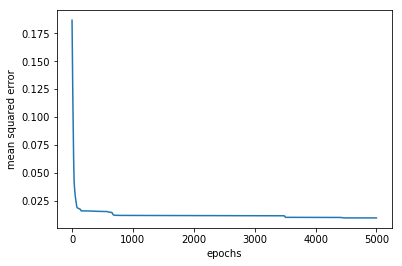

In [156]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=5000, learning_rate=0.012, display_loss=True)

In [0]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test= sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train=(Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test=(Y_pred_test>scaled_threshold).astype("int").ravel()


#Accuracy

In [0]:
acc_train= accuracy_score(Y_pred_binarised_train, Y_binarised_train)
acc_test= accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [152]:
print( acc_train , acc_test)

0.8392156862745098 0.7674418604651163
